##Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.



##Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Importing Libraries

In [64]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


## Reading and understanding the Data

In [65]:
bikesharing_data = pd.read_csv('/content/day.csv')
bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [66]:
# There are 730 rows and 16 columns in this dataset
bikesharing_data.shape

(730, 16)

In [67]:
# Checking the info
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [68]:
bikesharing_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in our data

In [69]:
# Descriptive Statistics
bikesharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

Dropping the columns that are not useful in our analysis

1. instant: This column appears to be an identifier and doesn't provide any meaningful information for predicting bike rentals.
2. casual: This column represents the count of casual bike riders. Since we're predicting the total count ('cnt'), it's best to exclude this column to prevent data leakage.
3. registered: Similar to the 'casual' column, this represents the count of registered bike riders and should be excluded for the same reasons.
4. dteday: This column appears to be a date-related column. While it might be used for time-series analysis, it's not suitable for direct use in a linear regression model.And we already have year, month and weekday as seperate feature.

In [70]:
# Before dropping dteday lets add a new column which represents age of each record in terms of days
bikesharing_data['days'] = (pd.to_datetime(bikesharing_data['dteday'], format='%d-%m-%Y') - pd.to_datetime('01-01-2018', format='%d-%m-%Y')).dt.days


In [71]:
bikesharing_data.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,5
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510,6
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959,7
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822,8
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,9


In [72]:
# Dropping unwanted columns
bikesharing_data.drop(['instant'], axis = 1, inplace = True)
bikesharing_data.drop(['dteday'], axis = 1, inplace = True)
bikesharing_data.drop(['casual'], axis = 1, inplace = True)
bikesharing_data.drop(['registered'], axis = 1, inplace = True)

In [73]:
bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


#Handling missing values

In [74]:
bikesharing_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days          0
dtype: int64

There are no null values in our data

#Checking Outliers

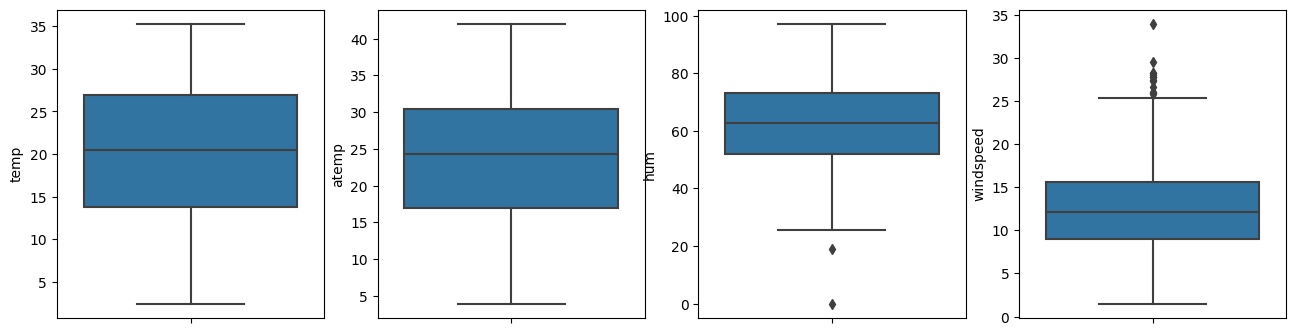

In [75]:
# Columns to check for outliers
#These features represent weather-related measurements. Outliers in these features could indicate unusual weather conditions that might affect bike demand.
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in cols:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=bikesharing_data)
    i+=1

As we can see that humidity and windspeed have some outlier we will retain this potential outlier as they represent extreme weather condition that could influence bike demand

In [76]:
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days        730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [77]:
bikesharing_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days          730
dtype: int64

We need to convert numerical feature such season,month,weekday,weathersituation into categories.

In [78]:
bikesharing_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikesharing_data.mnth = bikesharing_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bikesharing_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'extreme'},inplace = True)
bikesharing_data.weekday = bikesharing_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,spring,0,jan,0,mon,1,moderate,14.110847,18.181250,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.686950,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.470250,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.606100,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.463500,43.6957,12.522300,1600,4
5,spring,0,jan,0,sat,0,good,8.378268,11.660450,51.8261,6.000868,1606,5
6,spring,0,jan,0,sun,0,moderate,8.057402,10.441950,49.8696,11.304642,1510,6
7,spring,0,jan,0,mon,1,moderate,6.765000,8.112700,53.5833,17.875868,959,7
8,spring,0,jan,0,tue,1,good,5.671653,5.808750,43.4167,24.250650,822,8
9,spring,0,jan,0,wed,1,good,6.184153,7.544400,48.2917,14.958889,1321,9


In [79]:
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days        730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [80]:
categorical_columns = ['yr', 'holiday', 'workingday']
for column in categorical_columns:
    bikesharing_data[column] = bikesharing_data[column].astype('category')


In [81]:
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    category
 2   mnth        730 non-null    object  
 3   holiday     730 non-null    category
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  days        730 non-null    int64   
dtypes: category(3), float64(4), int64(2), object(4)
memory usage: 59.7+ KB


#Visualising Numeric Variable

Let's make a pairplot for numeric variables

<Figure size 1000x2000 with 0 Axes>

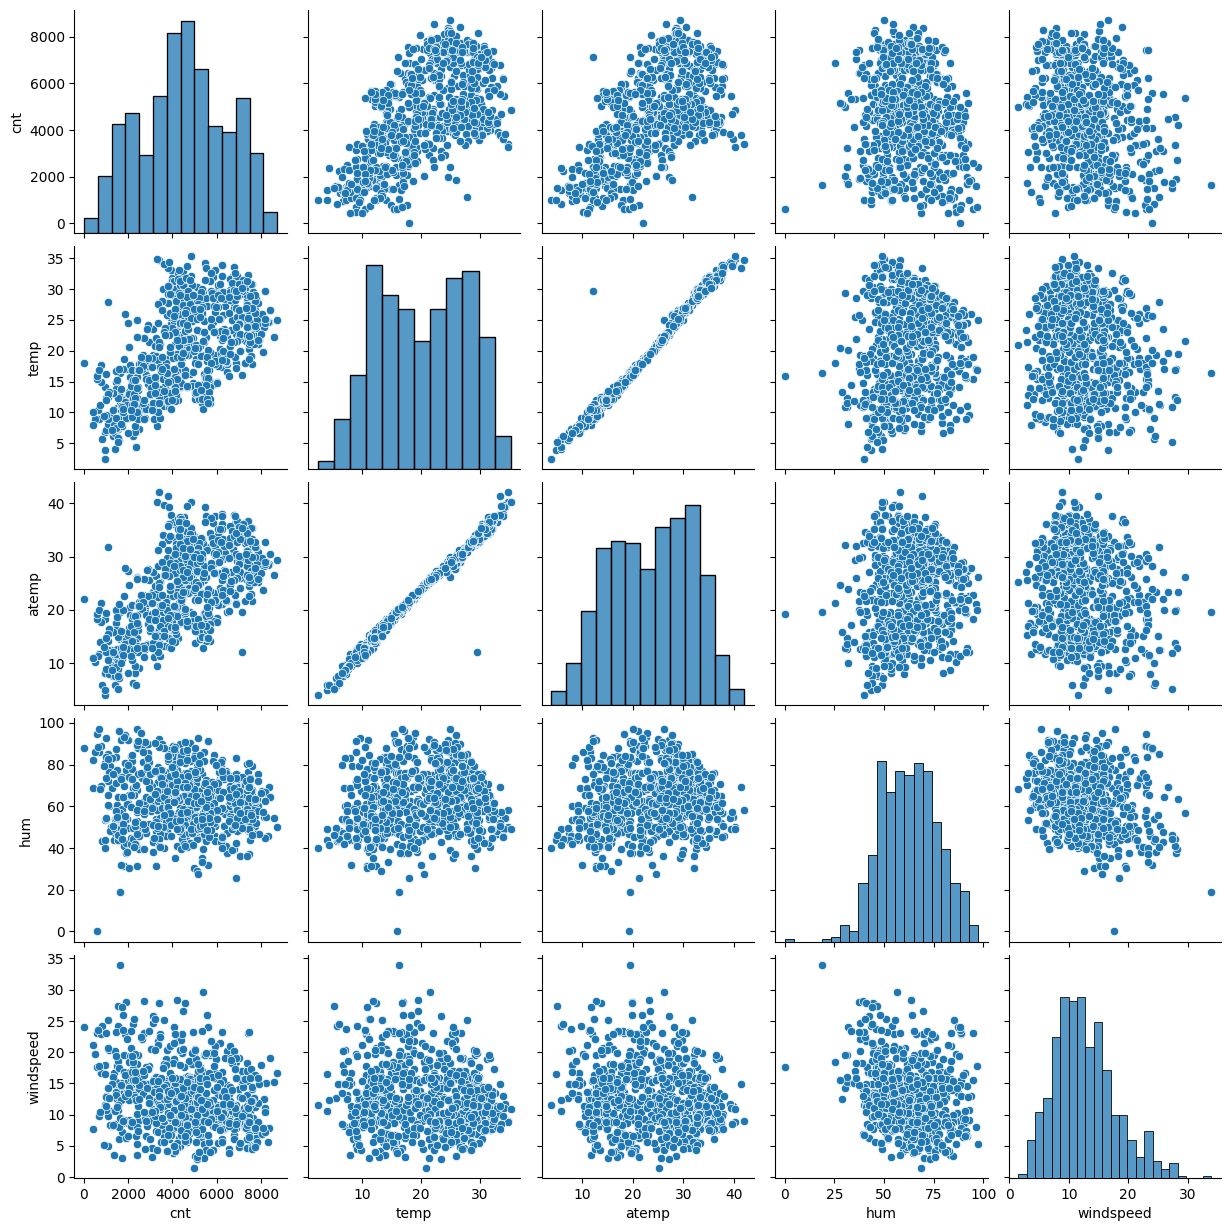

In [82]:
plt.figure(figsize = (10,20))
sns.pairplot(data=bikesharing_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

1. As we can see temp, atemp features have highest correlation with target feature cnt.

2. temp and atemp are also highly correlated.


Visualising numeric variables using heatmap

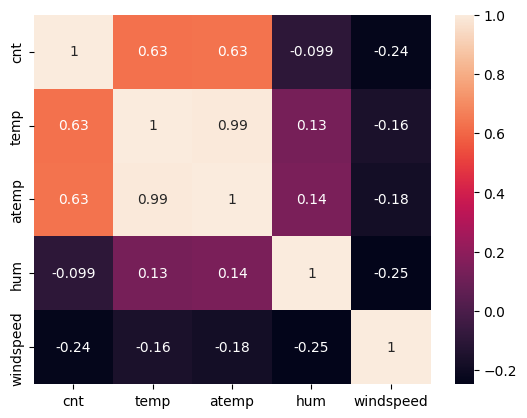

In [83]:
sns.heatmap(bikesharing_data[['cnt', 'temp', 'atemp', 'hum','windspeed']].corr(),annot=True)
plt.show()

As observed, the variables 'temp' and 'atemp' exhibit a high correlation with each other. Since multicollinearity can potentially affect the Variance Inflation Factor (VIF) analysis, this strong correlation between 'temp' and 'atemp' should be taken into consideration during the assessment of multicollinearity.

#Visualising Categorical Variables

Let's make a boxplot for categorical variables

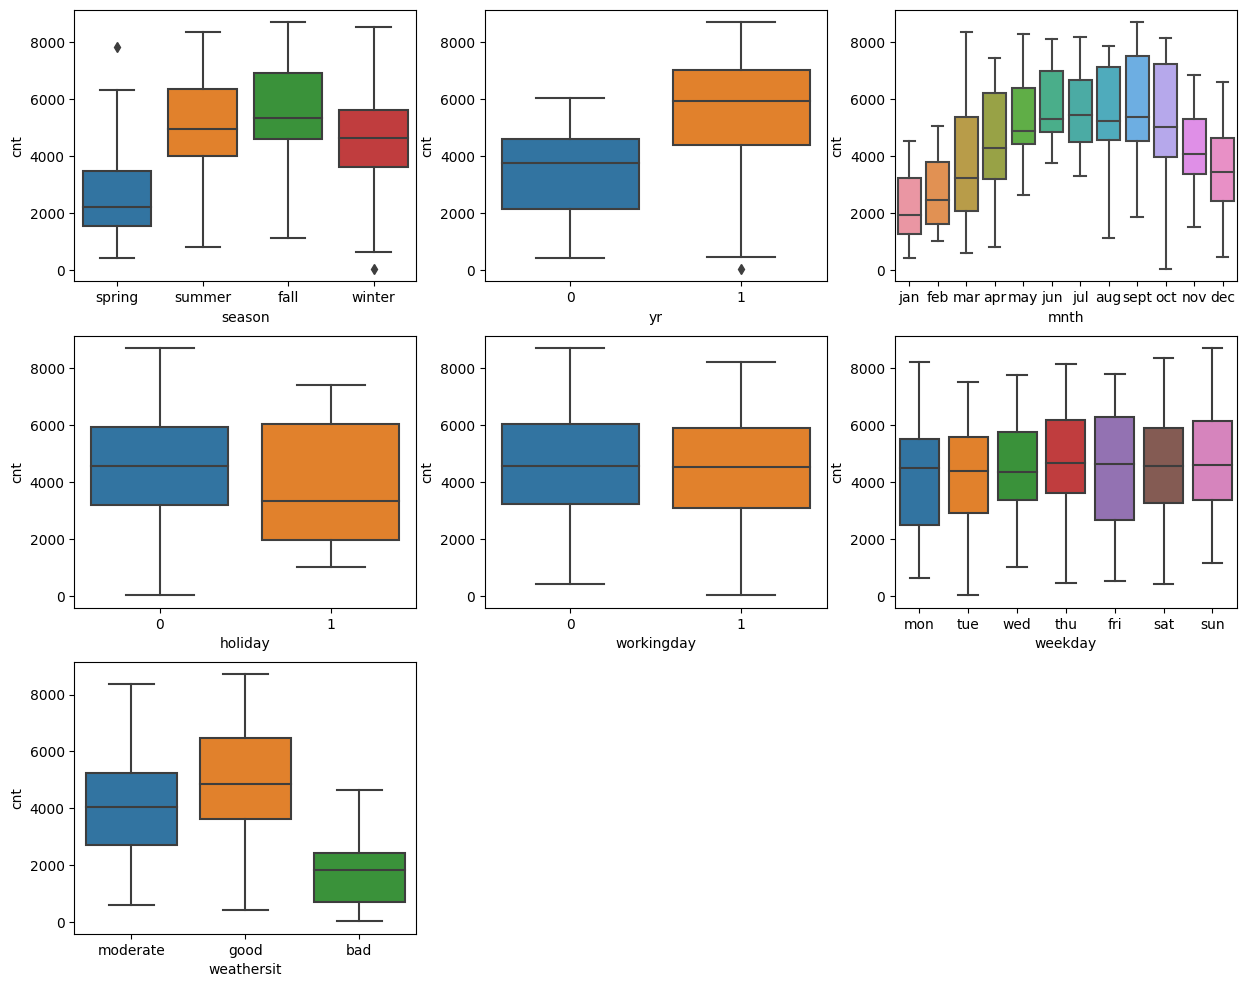

In [84]:
plt.figure(figsize=(15, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data =bikesharing_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing_data)

plt.show()

Below are the insights that can be drawn from the above plots
1. Fall season shows the highest rental bike demand.
2. Year 2019 demonstrates greater demand for rental bikes compared to the previous year.
3. Demand for bikes increases consistently from January to September, followed by a decrease in the subsequent months.
4. Holidays see higher demand compared to working days.
5. Weekends experience higher demand than weekdays.
6. Good weather conditions correspond to higher demand than moderate conditions, while bad weather conditions exhibit the lowest demand.

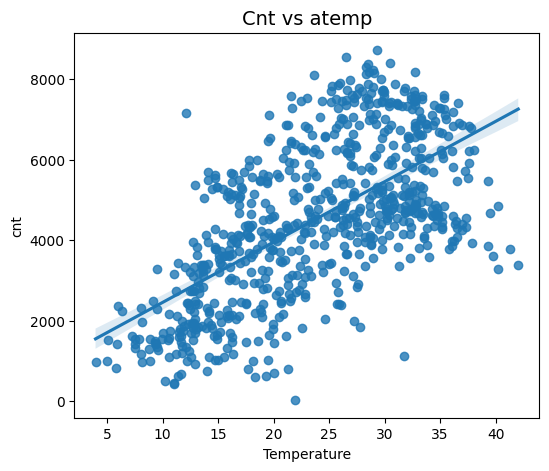

In [85]:
plt.figure(figsize=(6,5))
plt.title("Cnt vs atemp",fontsize=14)
sns.regplot(data=bikesharing_data,y="cnt",x="atemp")
plt.xlabel("Temperature")
plt.show()



*   Demand for renting bike is positively correlated with feel like temperature.
*   As the temperature increases demand for rented bike increased till 30 degree celcius after that demand decreased.



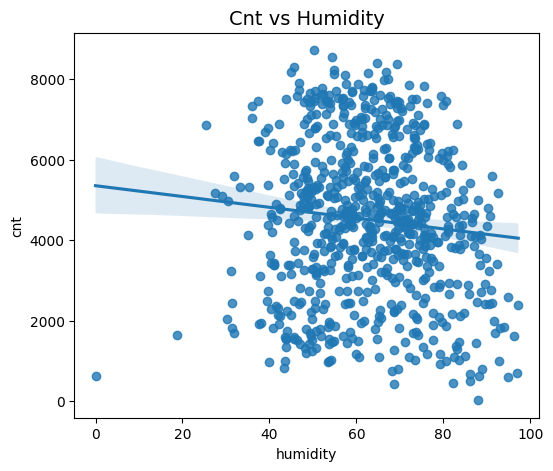

In [86]:
plt.figure(figsize=(6,5))
plt.title("Cnt vs Humidity",fontsize=14)
sns.regplot(data=bikesharing_data,y="cnt",x="hum")
plt.xlabel("humidity")
plt.show()



*   Humidity values are very much scattered.
*   Although from the regression line we can see that as the humidity incresed demand for rented bike decreased.



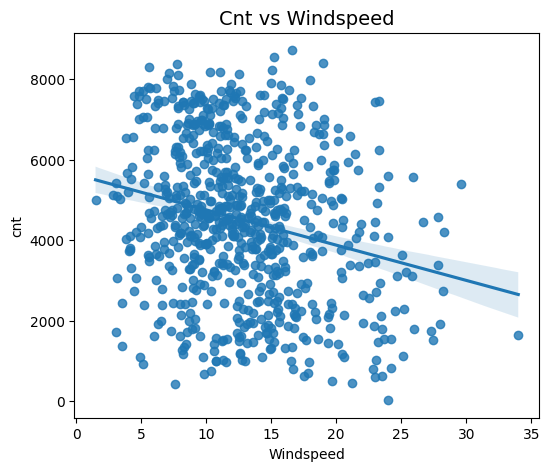

In [87]:
plt.figure(figsize=(6,5))
plt.title("Cnt vs Windspeed",fontsize=14)
sns.regplot(data=bikesharing_data,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()



*   Windspeed values are very much scatterd.
*   Although we can observe from the regression line that as the windspeed increased demand decreased.



## Preparing Data for Linear Regression

Create dummy variables for categorical columns

In [88]:

cat_columns = ['season', 'mnth', 'weekday']
bikesharing_data = pd.get_dummies(bikesharing_data, columns=cat_columns, drop_first=True)
bikesharing_data = pd.get_dummies(bikesharing_data, columns=['weathersit'])

In the 'weathersit' column, we did not drop the first column since we want to retain information about extreme weather situations as well

In [89]:
bikesharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [90]:
bikesharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Splitting the Data into Training and Testing Sets

In [91]:
#y contains target variable
y=bikesharing_data.pop('cnt')

#X contains all our independent variables
X=bikesharing_data

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,13.188347,16.22460,62.0417,10.250129,683,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
645,1,1,0,15.716653,19.38040,70.9583,12.708493,645,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
163,0,0,1,26.035000,30.08270,49.4583,20.458450,163,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,360,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
640,1,0,1,26.957500,29.95665,79.3750,4.458569,640,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [93]:
# Checking the shape of train and test data
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


##Rescaling the features

Let's rescale our continuous numeric variables to ensure comparable scales for better model interpretability.

In [94]:
# contains all continuous numeric columns
num_cols = ['temp','atemp','hum','windspeed','days']

# Using MinMax scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [95]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


## Building our Model

We will employ the Recursive Feature Elimination (RFE) technique to automate the feature selection process and build a Linear Regression model.

In [96]:
# Building a Linear Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [97]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [98]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 6),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 4),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [99]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [100]:
X_train.columns[~rfe.support_]


Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_may', 'mnth_nov',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

##Model 1
We will use all the variables selected by RFE

In [101]:
# Creating a function which takes a columns to be selected for model
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate']
def analyze_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

analyze_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     183.0
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.58e-185
Time:                        12:40:40   Log-Likelihood:                -4128.0
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     496   BIC:                             8349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1985.0919    

In [102]:
# Creating a function to calculate VIF which takes columns and calculate Vif
def calculate_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))
calculate_vif(cols)

               Features     VIF
3                 atemp  176.35
2                  temp  174.69
13      weathersit_good   48.48
14  weathersit_moderate   33.57
6                  days   12.26
0                    yr   10.13
12       weathersit_bad    4.38
8         season_winter    4.03
7         season_spring    2.93
4                   hum    1.88
10             mnth_oct    1.58
5             windspeed    1.29
11            mnth_sept    1.15
9              mnth_mar    1.12
1               holiday    1.02


Both atemp and temp have very high VIF but I am removing 'temp' in favor of 'atemp' as 'atemp' better captures how humans perceive temperature and is likely to have a stronger influence on bike rental demand, aligning with the target feature.

##Model 2

In [103]:
#Let's reassess the factors influencing the target feature after excluding 'temp'.
cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'days',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate']
analyze_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.26e-186
Time:                        12:40:40   Log-Likelihood:                -4128.1
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     497   BIC:                             8344.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1980.7179    

The VIF value for 'weathersit_good' is 48.19, which indicates a high degree of multicollinearity. High multicollinearity can make it difficult to determine the independent effect of this variable on the target.So we should drop it

##Model 3

In [104]:
#Let's reassess the factors influencing the target feature after excluding 'weathersit_good'.
cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'days',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad','weathersit_moderate']
analyze_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.26e-186
Time:                        12:40:41   Log-Likelihood:                -4128.1
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     497   BIC:                             8344.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3409.8196    

Considering the high Variance Inflation Factor (VIF) value for the 'days' variable, which indicates significant multicollinearity, we have decided to remove it from the model. This decision aims to enhance the model's stability and ensure the reliability of coefficient estimates.

##Model 4

In [105]:
#Let's reassess the factors influencing the target feature after excluding 'weathersit_good'.
cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad','weathersit_moderate']
analyze_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.9
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          5.65e-186
Time:                        12:40:41   Log-Likelihood:                -4132.4
No. Observations:                 511   AIC:                             8291.
Df Residuals:                     498   BIC:                             8346.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3275.6086    

Given the observation of a very high VIF for the humidity variable, which strongly suggests the presence of multicollinearity, we have opted to remove it from the model.

##Model 5

In [106]:
#Let's reassess the factors influencing the target feature after excluding 'humidity'.
cols = ['yr', 'holiday', 'atemp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad','weathersit_moderate']
analyze_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     220.3
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.56e-183
Time:                        12:40:41   Log-Likelihood:                -4141.0
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     499   BIC:                             8357.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2453.5691    

Here all the features have below 5% VIF which indicates all the features have very less collinearity but considering humidity variable which has high p value which means it less significant so we will consider removing it.

##Model 6

In [107]:
#Let's reassess the factors influencing the target feature after excluding 'humidity'.
cols = ['yr', 'holiday', 'atemp', 'windspeed',
       'season_spring',  'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad','weathersit_moderate']
analyze_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     242.2
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.71e-184
Time:                        12:40:41   Log-Likelihood:                -4141.6
No. Observations:                 511   AIC:                             8305.
Df Residuals:                     500   BIC:                             8352.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2613.1515    

#Insights:
 Through rigorous feature selection, our model now achieves an adjusted R-squared of 0.825, signifying strong explanatory power while accounting for feature complexity. The chosen predictors, including 'yr', 'atemp', 'windspeed', and seasonal indicators, offer significant insights into variations in the target variable. Multicollinearity has been addressed, ensuring robustness. This refined model demonstrates high predictive accuracy and generalization potential.

In [108]:
# Let us build our final model with resulted features

cols = ['yr', 'holiday', 'atemp', 'windspeed',
        'season_spring', 'mnth_mar', 'mnth_oct', 'mnth_sept',
        'weathersit_bad', 'weathersit_moderate']

lr1 = LinearRegression()
lr1.fit(X_train[cols], y_train)

print(lr1.intercept_)
print(lr1.coef_)


2613.15146510459
[ 1996.70192083  -679.27379805  3219.45866868  -702.03532415
 -1480.9971457    509.02509365   767.43122581   686.97714089
 -2291.1311366   -688.18147671]


#Residual Analysis of Training Data

In [109]:
y_train_cnt = lr1.predict(X_train[cols])

Text(0.5, 0, 'Errors')

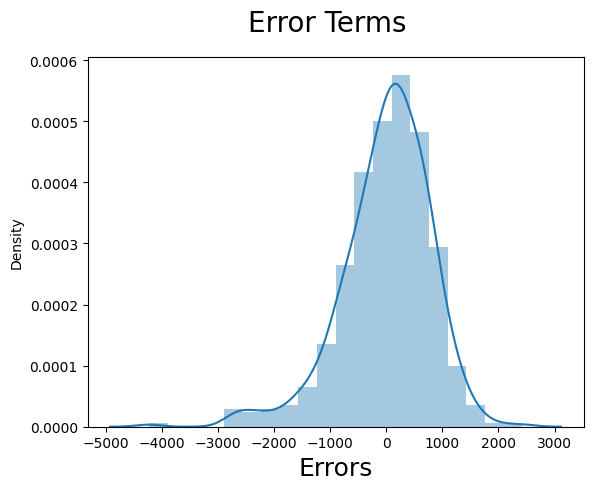

In [110]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

The errors exhibit a normal distribution with a mean of 0, indicating that the model first assumption have met.

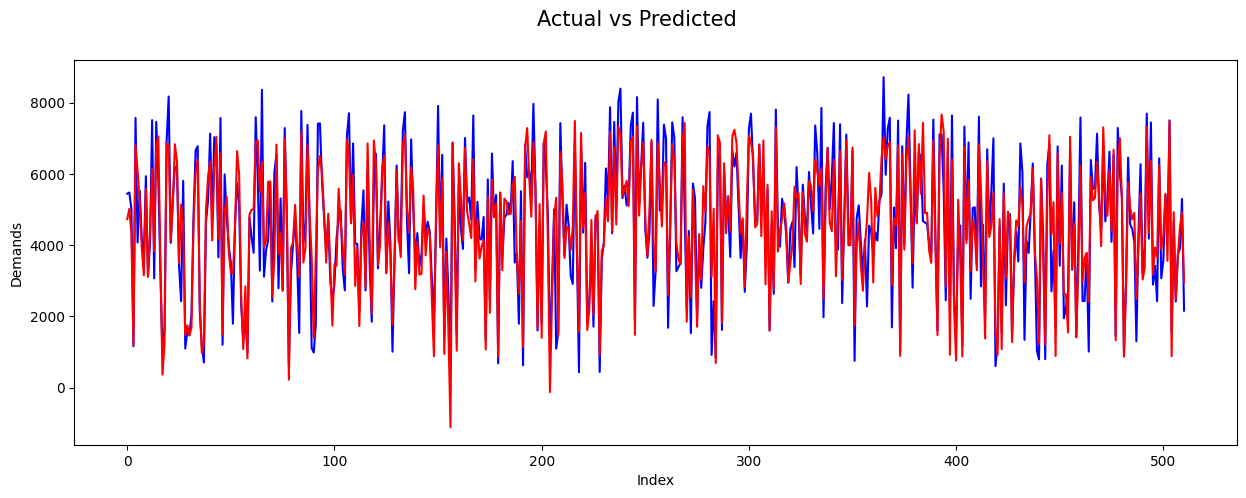

In [111]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(15,5))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_cnt, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

 It's evident that the model's predictions for the training data closely align with the actual values of the training dataset.

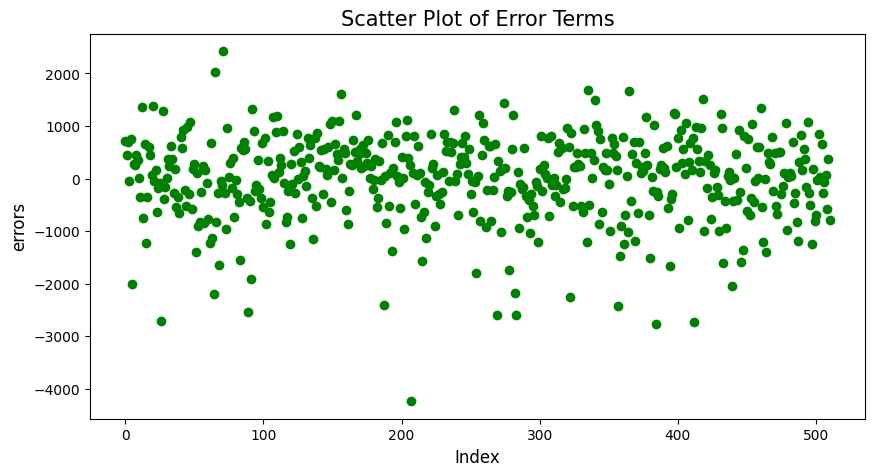

In [112]:
# Error Terms
c = [i for i in range(0, len(X_train), 1)]
errors = y_train - y_train_cnt

plt.figure(figsize=(10, 5))
plt.scatter(c, errors, color="green", marker='o')
plt.title('Scatter Plot of Error Terms', fontsize=15)
plt.xlabel('Index', fontsize=12)
plt.ylabel('errors', fontsize=12)
plt.show()


As we can see that our error terms are randomly distributed for train data which suggests that our model is capturing underlying patterns and relationships in data fairly well.

In [113]:
#Scale numerical variables in X_test,here we need to only transform the testdata
num_cols = ['temp','atemp','hum','windspeed','days']
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [114]:
#Columns from our final model
cols = ['yr', 'holiday', 'atemp', 'windspeed',
        'season_spring', 'mnth_mar', 'mnth_oct', 'mnth_sept',
        'weathersit_bad', 'weathersit_moderate']

#Predicting the values for test data
y_test_cnt = lr1.predict(X_test[cols])

In [115]:
# Calculating r2_score
r2_score(y_test,y_test_cnt)

0.8114088137862066

In [116]:
# Calculating adjusted r2 of test data
n = X_test[cols].shape[0]
p = X_test[cols].shape[1]
r2= 0.811
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2


0.8019134615384615

1. For train data:
r2_score = 0.829,
adjusted_r2_score = 0.825
2. For test data:
r2_score = 0.811,
adjusted_r2_score = 0.801

These scores suggest that our model is performing relatively well on both the training and test datasets:


*   The R-squared scores for both training and test data are fairly high, indicating that your model explains a substantial portion of the variance in the dependent variable.
*   The adjusted R-squared scores are also close to the R-squared scores, suggesting that the inclusion of independent variables in our model is likely appropriate, and we are not adding unnecessary variables.



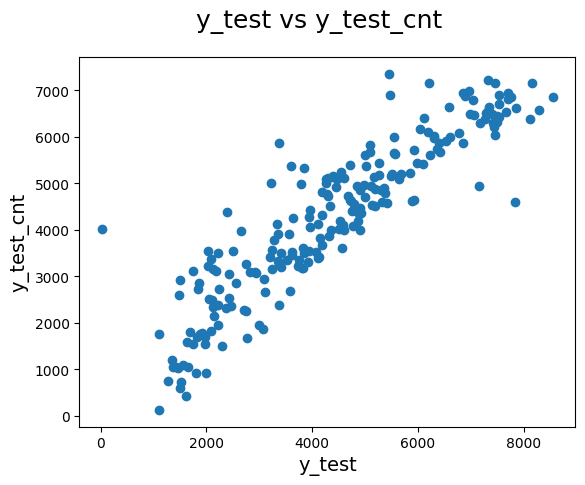

In [117]:
# To understand the spread of actual vs predicted data
fig = plt.figure()
plt.scatter(y_test, y_test_cnt)
fig.suptitle('y_test vs y_test_cnt', fontsize = 18)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_test_cnt', fontsize = 14)
plt.show()

We can observe that the dispersion of the residuals (error terms) remains fairly consistent across predictions, indicating that the variability of the error term doesn't significantly change as the predictor variable's value varies.

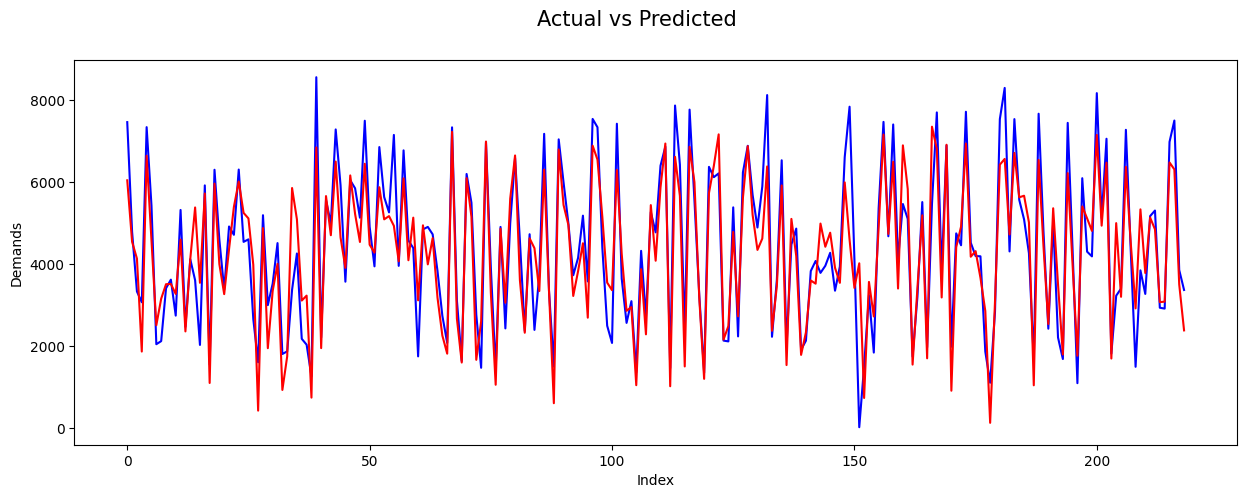

In [118]:
# To understand performance of our model
c = [i for i in range(0,len(X_test),1)]
plt.figure(figsize=(15,5))
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_cnt, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

As we can see that prediction for test data is very close to the actual test data which means our model is performing well.

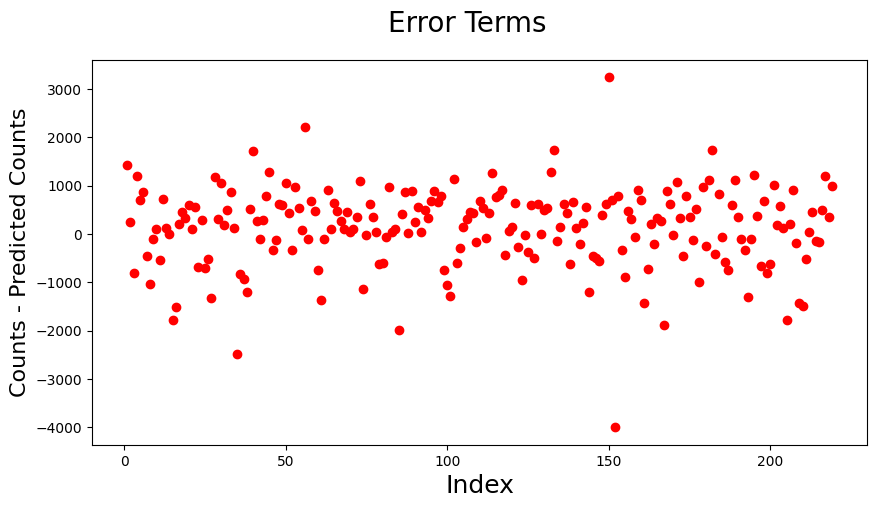

In [119]:
# Checking Error Terms
c = [i for i in range(1, 220, 1)]
errors = y_test - y_test_cnt

fig = plt.figure(figsize=(10, 5))
plt.scatter(c, errors, color="red", marker='o')
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Counts - Predicted Counts', fontsize=16)
plt.show()


As we can see that our error terms are randomly distributed for test data which suggests that our model is capturing underlying patterns and relationships in data fairly well.

# Bike Demand Prediction - Insights and Analysis

## Key Variables Impacting Bike Demand

### Year ('yr')
The 'yr' coefficient indicates a significant positive effect on bike demand, suggesting an increase in demand as years progress.

### Holiday ('holiday')
The 'holiday' coefficient is negative, implying that demand tends to decrease on holidays.

### Feeling Temperature ('atemp')
With a positive coefficient, 'atemp' shows a direct impact on demand. As feeling temperature increases, bike rentals tend to rise.

### Windspeed ('windspeed')
The 'windspeed' coefficient is negative, indicating that higher windspeed is associated with reduced bike demand.

### Season ('season_spring')
The 'season_spring' variable has a negative coefficient, indicating lower demand during the spring season.

### Month ('mnth_mar', 'mnth_oct', 'mnth_sept')
The coefficients for 'mnth_mar', 'mnth_oct', and 'mnth_sept' are positive, suggesting higher demand during March, October, and September.

### Weather Conditions ('weathersit_bad', 'weathersit_moderate')
Both 'weathersit_bad' and 'weathersit_moderate' have negative coefficients, indicating that unfavorable weather conditions lead to decreased bike demand.

## Model Evaluation
Our model exhibits a high goodness-of-fit, with an R-squared score of 0.829. This implies that the model effectively explains around 82.9% of the variance in bike demand.

## Residual Analysis
Residual analysis confirms that the model's errors are randomly distributed, indicating a lack of systematic bias in predictions.

## Multicollinearity Check
Variables were assessed for multicollinearity using the Variance Inflation Factor (VIF). The values are below 5, suggesting that multicollinearity is not a significant concern.

## Business Insights
The model provides actionable insights for the bike-sharing company:

- **Optimal Yearly Strategy:** As the 'yr' variable has a strong positive impact, the company should anticipate and plan for increased demand each year.
- **Holiday Marketing:** Since 'holiday' negatively affects demand, targeted marketing efforts could be employed to boost rentals on holidays.
- **Weather-Responsive Strategy:** Understanding the effect of weather conditions, especially 'weathersit_bad' and 'weathersit_moderate,' can guide resource allocation and marketing initiatives.
- **Seasonal Adjustments:** Given the influence of 'season_spring' and 'mnth_mar,' the company should manage bike availability and marketing strategies during these periods.

## Conclusion
Through this model, we've gained insights into the factors driving bike demand, equipping the bike-sharing provider with the knowledge to adapt its business strategy post-pandemic. The significant variables identified offer a roadmap for enhancing customer experiences and optimizing revenue growth in an evolving market landscape.
